## Deep learning with Keras: Classifying photographs

Data prep stuff...

In [31]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

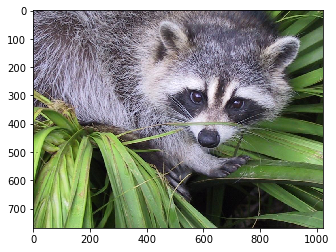

In [34]:
face = misc.face()
plt.imshow(face)

In [40]:
?misc.imread

In [41]:
tensor = misc.imread("C:/Users/ojones/Pictures/ed.png")

C:\Users\ojones\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


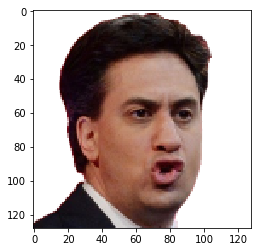

In [42]:
plt.imshow(tensor)

In [43]:
tensor.shape

(128, 128, 4)

In [47]:
# 4 channels: red, green, blue, opacity
tensor[80:100, 40:60, :]

array([[[166,  94,  76, 255],
        [163,  92,  70, 255],
        [164,  95,  67, 255],
        ..., 
        [179, 119,  94, 255],
        [181, 121,  97, 255],
        [184, 124, 100, 255]],

       [[163,  93,  75, 255],
        [162,  94,  72, 255],
        [158,  91,  63, 255],
        ..., 
        [179, 119,  92, 255],
        [186, 125, 100, 255],
        [188, 127, 103, 255]],

       [[158,  90,  69, 255],
        [160,  94,  70, 255],
        [162,  96,  69, 255],
        ..., 
        [175, 115,  88, 255],
        [183, 121,  97, 255],
        [184, 122,  98, 255]],

       ..., 
       [[144,  70,  50, 255],
        [143,  70,  54, 255],
        [140,  68,  53, 255],
        ..., 
        [168, 104,  76, 255],
        [172, 110,  82, 255],
        [177, 118,  91, 255]],

       [[150,  76,  56, 255],
        [145,  72,  54, 255],
        [146,  75,  56, 255],
        ..., 
        [166, 102,  74, 255],
        [170, 105,  77, 255],
        [173, 109,  80, 255]],

       

In [103]:
images = np.zeros((1000, 128, 128, 4))

In [149]:
for k in range(1000):
    images[k, :, :, :] = misc.imread("C:/Users/ojones/Pictures/ed.png")

C:\Users\ojones\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


---

In [150]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Preparing the data

In [151]:
m = images.shape[0]
from random import shuffle
indices = [x for x in range(m)]
shuffle(indices)
train_indices = indices[:int(m*0.6)]
val_indices = indices[int(m*0.6):int(m*0.8)]
test_indices = indices[int(m*0.8):]

In [152]:
labels = np.hstack((np.repeat(0, 600), np.repeat(1, 400)))

In [153]:
labels.shape

(1000,)

In [154]:
images = (2*images - np.max(images)) / np.max(images)

X_train = images[train_indices, :, :, 0:3]
X_val = images[val_indices, :, :, 0:3]
X_test = images[test_indices, :, :, 0:3]

from keras.utils import to_categorical

# Time series data is in layers 0 to 2
# Neural nets need scaled and ideally 0-centred data

y_train = labels[train_indices]
y_val = labels[val_indices]
y_test = labels[test_indices]

In [155]:
print(X_train.shape)
print(y_train.shape)

(600, 128, 128, 3)
(600,)


In [156]:
y_train

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

Can we tell between different people's data by eye?

Let's plot a few series for some different people - say, 5 series for 3 people.

### The neural network

In [157]:
# Initiate the model - we'll use a sequential model so we can add to it
model = Sequential()

# Start with a convolutional layer:
#  * filters: The number of "features" we want to learn; number of patterns to try to identify
#  * kernel_size: The "window" to consider, i.e. we look at a rolling window captuiring [kernel_size] time points at once
#  * strides: How many time steps to "roll forward" each time we move the window
#  * activation: The activation function to use; convolutional layers typically use REctified Linear Unit function
#  * input_shape: We're feeding in observations each of shape 260{time points}*3{directional acceleration features}
model.add(Conv2D(filters=40, kernel_size=20, strides=2, activation="relu", input_shape=(128, 128, 3)))
print(model.output_shape)

# Another convolutional layer: this one finds "meta-patterns" in the patterns the first layer picked up
model.add(Conv2D(filters=40, kernel_size=10, activation="relu"))
print(model.output_shape)

# If the net is too large and computation too slow, we can reduce the number of parameters with max pooling
# This layer would reduce the number of parameters by half by combining ("pooling") parameters
# i.e. parameters get paired up (by position) and the maximum one only is kept
model.add(MaxPooling2D(pool_size=4))
print(model.output_shape)

# We still have a 3-dimensional set of parameters - we need to make this 2-dimensional, so we "flatten"
# (Unstack all the leaves and lay them out next to each other)
model.add(Flatten())
print(model.output_shape)

# We need to finish with a couple of dense layers: one to detect relationships between the (flattened)
# convolutional neurons, and...
model.add(Dense(100, activation="sigmoid"))
print(model.output_shape)

# ... one to present the output as a one-hot vector.
# (We typically use softmax in the very final layer since it provides a "stronger" signal than sigmoid)
model.add(Dense(1, activation="sigmoid"))
print(model.output_shape)

(None, 55, 55, 40)
(None, 46, 46, 40)
(None, 11, 11, 40)
(None, 4840)
(None, 100)
(None, 1)


In [158]:
# We have to compile the network before we can run it, defining:
# * Loss function to use (always categorical cross-entropy for multi-class logistic regression)
# * Optimizer to use
#   ("adam" = "ADAptive Movement estimation", but e.g. "sgd" = "Stochastic Gradient Descent" will work, just slower)
# * Metrics to report (NOT used for adjusting parameters - that's what the loss function is for!)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [160]:
# Fit it!
# * X_train and y_train are training data/labels
# * epochs: How many times to pass the training data through and update the network's parameters
# * batch_size: How many observations to include in each batch the optimizer sees
# * Also show us the accuracy for the cross-validation set
model.fit(X_train, y_train, epochs=2, batch_size=50, validation_data=(X_val, y_val))

Train on 600 samples, validate on 200 samples
Epoch 1/2
600/600 [==============================] - 113s 189ms/step - loss: 0.6764 - acc: 0.6067 - val_loss: 0.6777 - val_acc: 0.5950
Epoch 2/2
600/600 [==============================] - 113s 188ms/step - loss: 0.6717 - acc: 0.6067 - val_loss: 0.6825 - val_acc: 0.5950


At this point we could try to improve that cross-validation accuracy score, e.g. change network structure.

### Reporting

In [161]:
from sklearn.metrics import classification_report, confusion_matrix

In [162]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.58      1.00      0.74       117
          1       0.00      0.00      0.00        83

avg / total       0.34      0.58      0.43       200

[[117   0]
 [ 83   0]]


C:\Users\ojones\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---

## Visualising features

We can try to visualise the "features" of the time series which the convolutional layers of the net have learned to identify.

In [19]:
# Get the values from each layer
layer_dict = dict([(layer.name, layer) for layer in conv_nn.layers])
layer_dict

{'conv1d_1': <keras.layers.convolutional.Conv1D at 0x1ef8e0ee7f0>,
 'conv1d_2': <keras.layers.convolutional.Conv1D at 0x1ef9446c5f8>,
 'dense_1': <keras.layers.core.Dense at 0x1ef94bb7518>,
 'dense_2': <keras.layers.core.Dense at 0x1ef94d96908>,
 'flatten_1': <keras.layers.core.Flatten at 0x1ef94ca6be0>,
 'max_pooling1d_1': <keras.layers.pooling.MaxPooling1D at 0x1ef94c55be0>}

In [20]:
# Plot the weights from a given layer
def plot_filter(layer, k):
    x = layer_dict[layer].get_weights()[0][:, :, k]
    sns.tsplot(x[:, 0], color="red")
    sns.tsplot(x[:, 1], color="green")
    sns.tsplot(x[:, 2], color="blue")

# Feature heatmap? Pop layers? SVM kernel?

---

## Repurposing a previously-trained model

If we take off the final fully-connected layers of the network, we can train a new network making use of the convolutional features we've already learned.

In [25]:
# Remove the last layer in the model (the output layer)
conv_nn.pop()
# Remove 1 more (the first fully connected layer)
conv_nn.pop()

conv_nn.add(Dense(1, activation = "linear"))
#... etc.